<a href="https://colab.research.google.com/github/JakeOh/202505_BD50/blob/main/lab_da/da04_matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 필요한 모듈 import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터셋 준비

In [2]:
tips = sns.load_dataset('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


# `matplotlib.pyplot` 모듈을 사용한 데이터 시각화

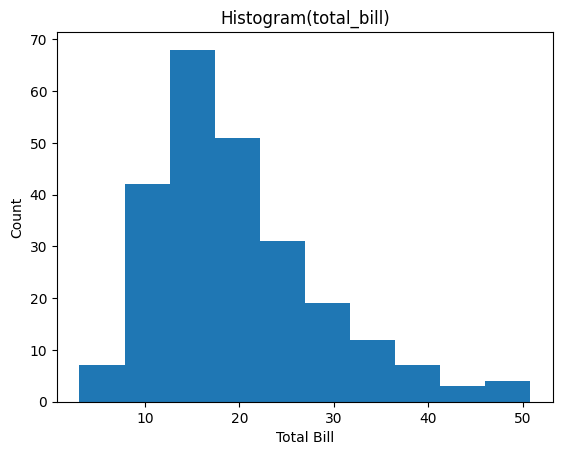

In [13]:
# 1. Figure 객체 생성
fig = plt.figure()

# 2. Figure 객체에 Axes 설정 - Subplot을 생성.
# axis = fig.add_subplot(1, 1, 1)  # add_subplot(nrows, ncols, index)
axis = fig.add_subplot(111)  # add_subplot(pos): '행/열/인덱스' 순서로 만들어진 3자리 정수

# 3. Axis에 그래프를 그림.
axis.hist(x=tips.total_bill)

# 4. 그래프 옵션 설정
axis.set_title('Histogram(total_bill)')
axis.set_xlabel('Total Bill')
axis.set_ylabel('Count')

# 5. 그래프 보여주기.
plt.show()

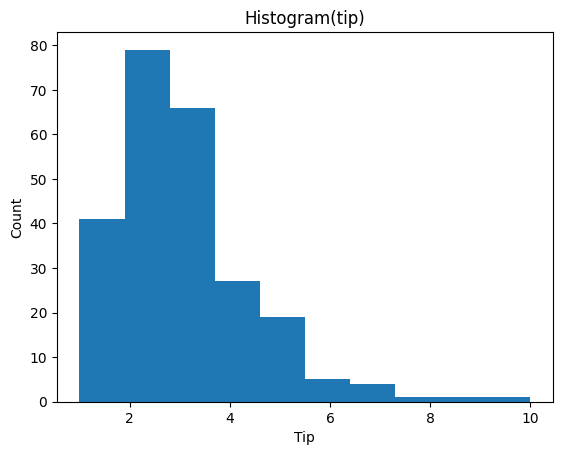

In [18]:
# 1. Figure, Axes 객체 생성
fig, axis = plt.subplots()  # subplots의 파라미터 nrows, ncols의 기본값 1

# 2. 그래프 그림
axis.hist(x=tips.tip)

# 3. 옵션 설정 - Axes 객체의 메서드 이용
axis.set_title('Histogram(tip)')
axis.set_xlabel('Tip')
axis.set_ylabel('Count')

# 4. 그래프 보여줌
plt.show()

1개의 Figure에 1개의 Subplot(Axes)만 있는 경우에는 matplotlib.pyplot 모듈의 top-level 그래프 함수(plot, scatter, hist, boxplot, ...)만 이용할 수 있음.

top-level 그래프 함수를 사용하면 Figure, Axes 객체를 생성하는 코드를 작성할 필요가 없음.

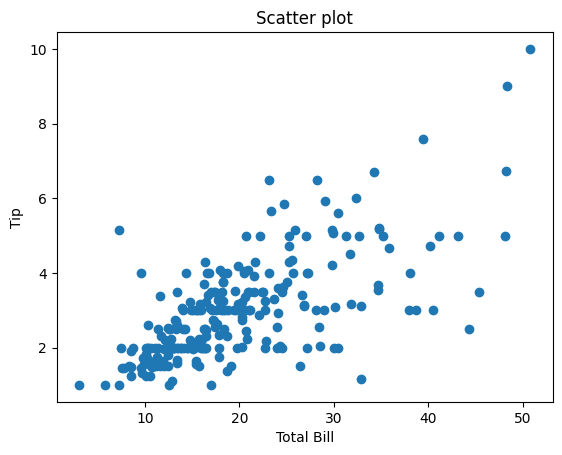

In [24]:
# 그래프 그림(Figure 생성, Axes 생성)
plt.scatter(x=tips.total_bill, y=tips.tip)

# 옵션 설정 - plt 모듈의 top-level 함수 이용
plt.title('Scatter plot')
plt.xlabel('Total Bill')
plt.ylabel('Tip')

# 그래프 보여주기
plt.show()

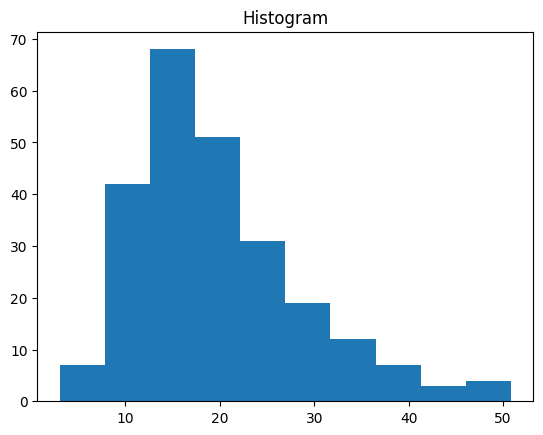

In [27]:
plt.hist(x=tips.total_bill)
plt.title('Histogram')
plt.show()

# Box Plot(상자 그림)

연속형 자료(숫자 타입 데이터)의 기술 통계량(최솟값, 25%, 중위값(중앙값), 75%, 최댓값)과 이상치(outlier)를 상자 모양으로 시각화.

In [29]:
tips.total_bill.describe()

,total_bill
count,244.000000
mean,19.785943
std,8.902412
min,3.070000
25%,13.347500
50%,17.795000
75%,24.127500
max,50.810000


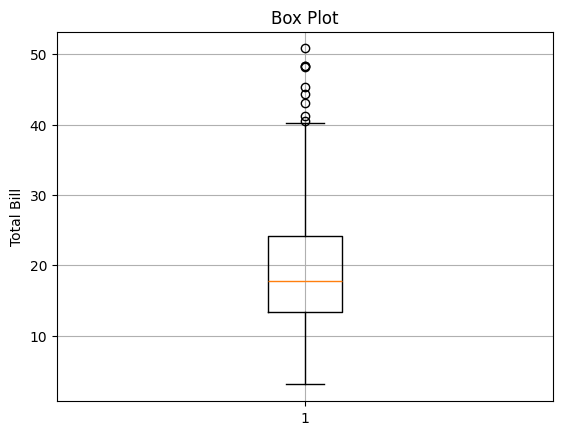

In [32]:
plt.boxplot(x=tips.total_bill)
plt.title('Box Plot')
plt.ylabel('Total Bill')
plt.grid()
plt.show()

In [35]:
tips[['total_bill', 'tip']].describe()

,total_bill,tip
count,244.000000,244.000000
mean,19.785943,2.998279
std,8.902412,1.383638
min,3.070000,1.000000
25%,13.347500,2.000000
50%,17.795000,2.900000
75%,24.127500,3.562500
max,50.810000,10.000000


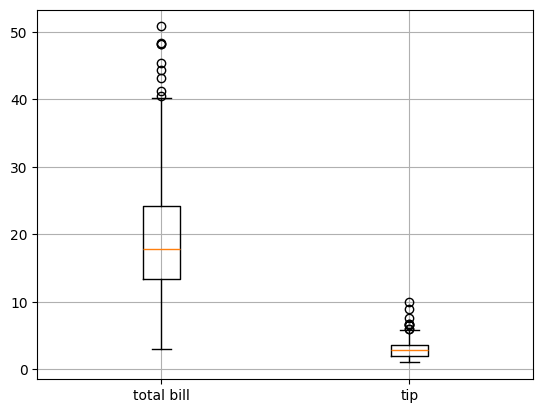

In [38]:
plt.boxplot(x=[tips.total_bill, tips.tip],
            tick_labels=['total bill', 'tip'])
plt.grid()
plt.show()

1개의 Figure에 2개의 Subplot(Axes)을 좌/우로 배치. 왼쪽에는 total_bill의 box plot을, 오른쪽에는 tip의 box plot을 시각화.

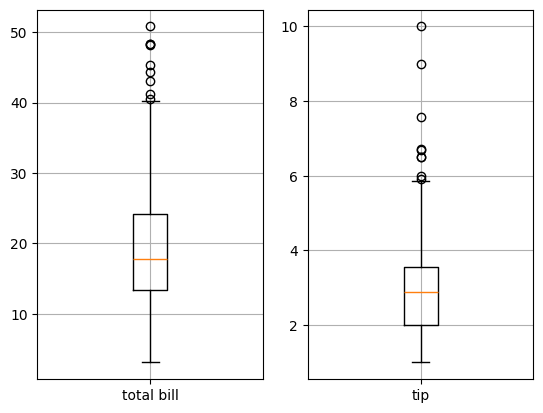

In [47]:
fig = plt.figure()  # Figure 객체 생성

ax1 = fig.add_subplot(1, 2, 1)  # 첫번째 Axes를 Figure 추가 fig.add_subplot(111)
ax2 = fig.add_subplot(122)  # 두번째 Axes를 추가

ax1.boxplot(x=tips.total_bill, tick_labels=['total bill'])
ax2.boxplot(x=tips.tip, tick_labels=['tip'])

ax1.grid()
ax2.grid()

plt.show()

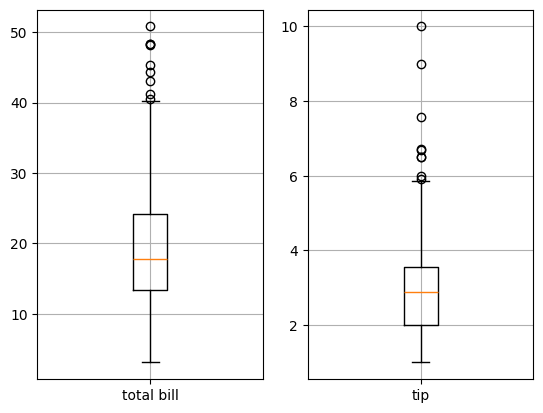

In [55]:
fig, axes = plt.subplots(ncols=2)
# print(type(axes))  #> ndarray(배열)
# print(axes)  #> Axes 객체 2개를 저장하는 배열

axes[0].boxplot(x=tips.total_bill, tick_labels=['total bill'])
axes[1].boxplot(x=tips.tip, tick_labels=['tip'])

axes[0].grid()
axes[1].grid()

plt.show()

## 성별 팁의 box plot

*   남성(Male) tip의 기술 통계량 출력
*   여성(Female) tip의 기술 통계량 출력
*   성별 tip의 box plot을 1개의 Axes에 시각화.

In [61]:
male_tips = tips[tips.sex == 'Male'].tip
male_tips.describe()

,tip
count,157.000000
mean,3.089618
std,1.489102
min,1.000000
25%,2.000000
50%,3.000000
75%,3.760000
max,10.000000


In [62]:
female_tips = tips[tips.sex == 'Female'].tip
female_tips.describe()

,tip
count,87.000000
mean,2.833448
std,1.159495
min,1.000000
25%,2.000000
50%,2.750000
75%,3.500000
max,6.500000


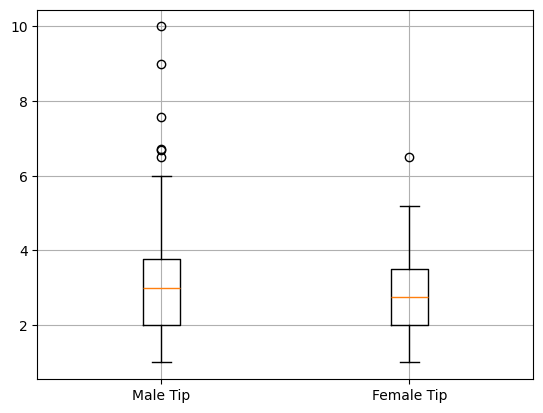

In [64]:
plt.boxplot(x=[male_tips, female_tips],
            tick_labels=['Male Tip', 'Female Tip'])
plt.grid()
plt.show()

## 시간(Lunch, Dinner)별 tip의 box plot

In [68]:
lunch_tips = tips[tips.time == 'Lunch'].tip
lunch_tips.describe()

,tip
count,68.000000
mean,2.728088
std,1.205345
min,1.250000
25%,2.000000
50%,2.250000
75%,3.287500
max,6.700000


In [69]:
dinner_tips = tips[tips.time == 'Dinner'].tip
dinner_tips.describe()

,tip
count,176.000000
mean,3.102670
std,1.436243
min,1.000000
25%,2.000000
50%,3.000000
75%,3.687500
max,10.000000


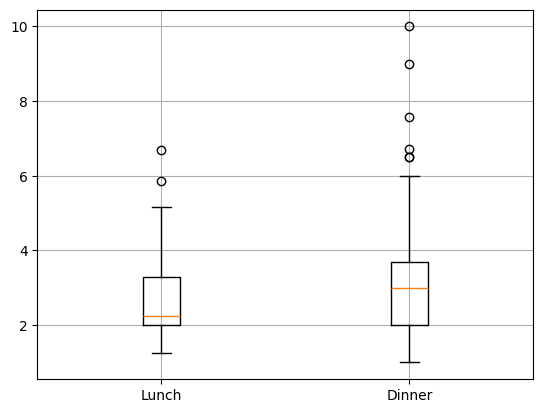

In [71]:
plt.boxplot(x=[lunch_tips, dinner_tips],
            tick_labels=['Lunch', 'Dinner'])
plt.grid()
plt.show()

## 요일별 tip의 box plot

In [72]:
tips.day.unique()  #> DataFrame에서 값이 등장하는 순서로 유일한 값들을 리턴.

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [75]:
tips.day.cat.categories  #> data_frame.column.cat.categories: 카테고리 객체

Index(['Thur', 'Fri', 'Sat', 'Sun'], dtype='object')

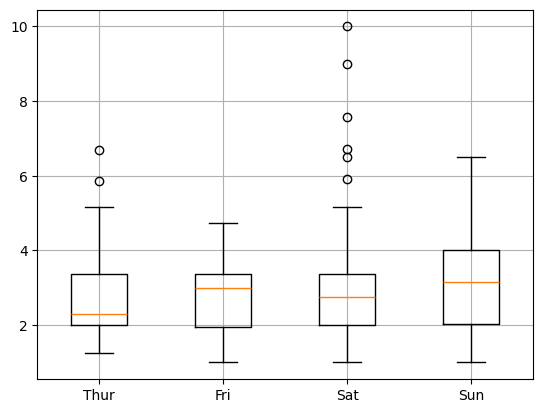

In [82]:
# 카테고리 객체는 배열처럼 for-in 반복문에서 사용할 수 있는 iterable 타입

data = []  # 요일별 tip 컬럼들을 저장하기 위한 빈 리스트
for c in tips.day.cat.categories:
    tip_by_day = tips[tips.day == c].tip
    data.append(tip_by_day)

plt.boxplot(x=data, tick_labels=tips.day.cat.categories)
plt.grid()
plt.show()

# Histogram(히스토그램)

연속형 자료(숫자 타입 데이터)를 구간으로 나눠서 구간 안에 포함된 자료의 개수를 막대로 시각화한 그래프.

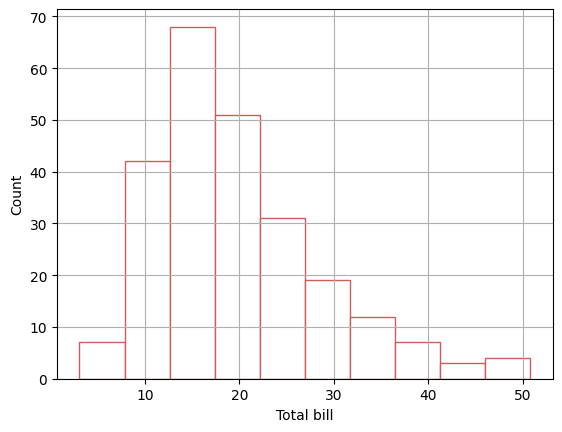

In [102]:
plt.hist(x=tips.total_bill,     # x=히스토그램을 그리기 위한 연속형 자료(변수, 컬럼)
         bins=10,               # bins=막대 개수 또는 구간(배열)
         edgecolor='IndianRed', # edgecolor=막대 테두리 색깔
         color='white')         # color=막대 내부를 채우는 색깔
plt.grid()
# plt.yticks([0, 10, 30, 50, 60])
plt.xlabel('Total bill')
plt.ylabel('Count')
plt.show()

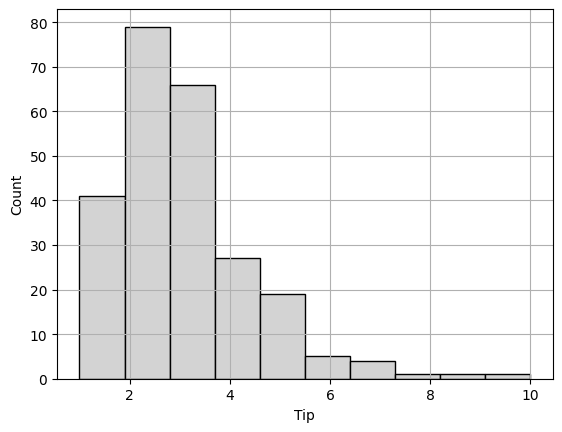

In [108]:
# tip의 히스토그램
plt.hist(x=tips.tip, edgecolor='black', color='LightGray')
plt.grid()
plt.xlabel('Tip')
plt.ylabel('Count')
plt.show()

# Bar Plot(막대 그래프)

카테고리(범주) 타입의 변수(컬럼)의 빈도수를 막대로 표현한 그래프.

## 세로 막대 그래프(vertical bar plot)

In [112]:
gender_count = tips.sex.value_counts()
gender_count

,count
sex,
Male,157
Female,87


In [114]:
print(type(gender_count))

<class 'pandas.core.series.Series'>


In [115]:
gender_count.index

CategoricalIndex(['Male', 'Female'], categories=['Male', 'Female'], ordered=False, dtype='category', name='sex')

In [116]:
gender_count.values

array([157,  87])

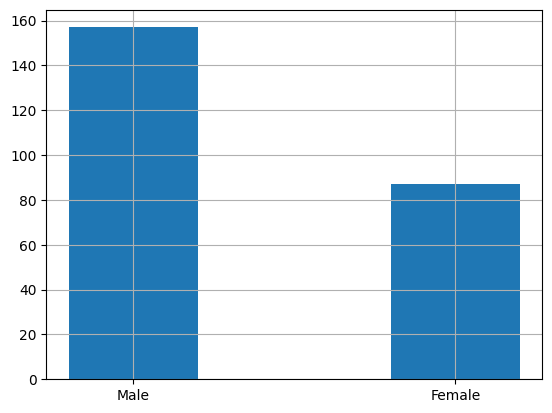

In [122]:
plt.bar(x=gender_count.index, height=gender_count.values,
        width=0.4)
plt.grid()
plt.show()

## 가로 막대 그래프(horizontal bar plot)

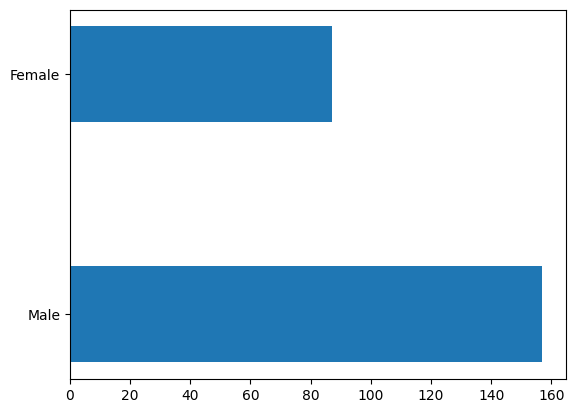

In [124]:
plt.barh(y=gender_count.index,
         width=gender_count.values,
         height=0.4)
plt.show()

테이블의 손님 수(size)의 빈도수를 세로 막대 그래프로 시각화.

In [125]:
size_count = tips['size'].value_counts()
size_count

,count
size,
2,156
3,38
4,37
5,5
1,4
6,4


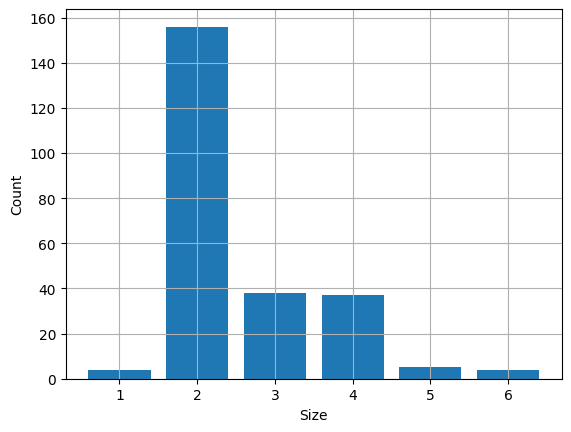

In [128]:
plt.bar(x=size_count.index, height=size_count.values)
plt.xlabel('Size')
plt.ylabel('Count')
plt.grid()
plt.show()

요일의 빈도수를 가로 막대 그래프로 시각화

In [129]:
day_count = tips.day.value_counts()
day_count

,count
day,
Sat,87
Sun,76
Thur,62
Fri,19


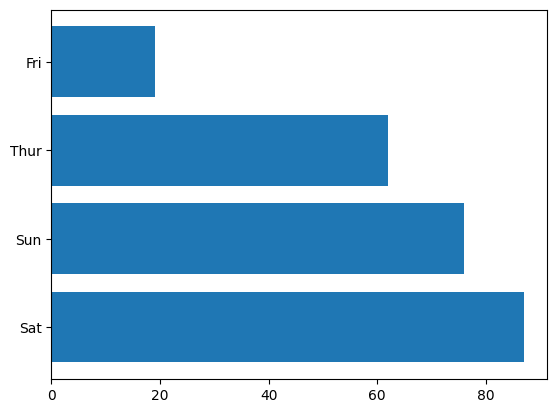

In [130]:
plt.barh(y=day_count.index, width=day_count.values)
plt.show()